In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns



In [3]:
import warnings
warnings.filterwarnings("ignore")

Создаём "большой" датасет с данными по всем компаниям одновременно.

# Start

In [4]:
folder_name = '/Users/artemijstankevic/oil_gas_train'
folder_name_test = '/Users/artemijstankevic/oil_gas_train_test'

folder = os.listdir(folder_name)
folder_test = os.listdir(folder_name_test)

folder.remove('~$CRBO.xlsx')
folder.remove('.DS_Store')
folder.remove('CRBO.xlsx')

# Вставляем дополнительные фичи

Тут создаем новые фичи, пока что это сделано только на 1 тикере, ниже новые фичи добавлены уже для всех тикеров.

In [9]:
data_CEV = pd.read_excel(folder_name_test+'/'+'COG.xlsx')

data_CEV = pd.read_excel(folder_name_test+'/'+'COG.xlsx')

In [10]:
data_CEV = data_CEV.iloc[28:,8:]
data_CEV = data_CEV.iloc[:333, :]
data_CEV.dropna()
data_CEV = data_CEV.T

data_CEV = data_CEV.reset_index(drop = True)
data_CEV.columns = data_CEV.iloc[0, :]
data_CEV = data_CEV.iloc[1:, :]


In [11]:
dates = data_CEV['BALANCE SHEET']

In [12]:
new_features = pd.DataFrame(dates)
new_features.rename(columns = {'BALANCE SHEET': 'date'}, inplace = True)
new_features.reset_index(inplace = True, drop = True)
new_features['date'] = pd.to_datetime(new_features['date'])

**COVID**

In [13]:
new_features['new COVID cases'] = np.zeros(42)
covid_2020Q1_2021Q2 = [192079, 2422107, 4600000, 13140000, 10190000, 3220000]
#From OurWorldIndata.org

new_features['new COVID cases'][36:] = covid_2020Q1_2021Q2

**WTI prices**

In [14]:
new_features['WTI prices'] = np.zeros(42)
wti_prices_quarterly = [93.54, 102.23, 89.72, 94.01,#2011
                       102.88, 93.43, 92.18, 87.96,#2012
                       94.34, 94.1, 105.84, 97.34,#2013
                       98.75, 103.35, 97.78, 73.16,#2014
                       48.54, 57.85, 46.42, 41.95,#2015
                       33.18, 45.41, 44.85, 49.14,#2016
                       51.77, 48.24, 48.16, 55.36,#2017
                       62.89, 68.03, 69.76, 59.08,#2018
                       54.83, 59.78, 56.37, 56.96,#2019
                       45.76, 27.81, 40.89, 42.45,#2020
                       57.79, 66.09]#2021
#from eia.gov

In [15]:
new_features['WTI prices'] = wti_prices_quarterly

**CPI index**

In [16]:
new_features['CPI index'] = np.zeros(42)
cpi_quarterly = [2.1, 3.4, 3.8, 3.3,#2011
                 2.8, 1.9, 1.7, 1.9,#2012
                 1.7, 1.4, 1.6, 1.2,#2013
                 1.4, 2.1, 1.8, 1.2,#2014
                 -0.1, 0, 0.1, 0.5,#2015
                 1.1, 1, 1.1, 1.8,#2016
                 2.5, 1.9, 2, 2.1,#2017
                 2.2, 2.7, 2.6, 2.2,#2018
                 1.6, 1.8, 1.8, 2,#2019
                 2.1, 0.4, 1.2, 1.2,#2020
                 1.9, 4.8]#2021

#from data.oecd.org

In [17]:
new_features['CPI index'] = cpi_quarterly

**Seasons**

In [18]:
new_features['Q1'] = [1,0,0,0]*10 + [1,0]
new_features['Q2'] = [0,1,0,0]*10 + [0,1]
new_features['Q3'] = [0,0,1,0]*10 + [0,0]
new_features['Q4'] = [0,0,0,1]*10 + [0,0]

In [19]:
new_features.head()

,date,new COVID cases,WTI prices,CPI index,Q1,Q2,Q3,Q4
0,2011-03-31,0.0,93.54,2.1,1,0,0,0
1,2011-06-30,0.0,102.23,3.4,0,1,0,0
2,2011-09-30,0.0,89.72,3.8,0,0,1,0
3,2011-12-31,0.0,94.01,3.3,0,0,0,1
4,2012-03-31,0.0,102.88,2.8,1,0,0,0


In [23]:
#Тестовая склейка с одним из датасетов
data_CEV.shape

(42, 333)

In [24]:
tabl = pd.concat([data_CEV, new_features], axis = 1)

In [25]:
tabl.head()

,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,"Selling, General & Admin",...,Cash + AR / Total Assets,Cash % of Revenue,date,new COVID cases,WTI prices,CPI index,Q1,Q2,Q3,Q4
1,209.008992,193.364,0.08091,NaN,-140.512,68.496992,0.327723,0,-30.607,-24.299,...,NaN,NaN,2011-06-30,0.0,102.23,3.4,0.0,1.0,0.0,0.0
2,241.599008,247.556,-0.024063,NaN,-137.551008,104.048,0.430664,0,-30.598,-26.006,...,NaN,NaN,2011-09-30,0.0,89.72,3.8,0.0,0.0,1.0,0.0
3,262.180992,265.75,-0.01343,NaN,-152.599008,109.581984,0.417963,0,-48.139,-27.949,...,NaN,NaN,2011-12-31,0.0,94.01,3.3,0.0,0.0,0.0,1.0
4,268.04,253.727,0.056411,NaN,-164.62,103.42,0.385838,0,-31.77,-16.232,...,NaN,NaN,2012-03-31,0.0,102.88,2.8,1.0,0.0,0.0,0.0
5,272.136,267.583,0.017015,0.30203,-198.39,73.746,0.27099,0,-26.55,-22.549,...,0.028947,0.030967,2012-06-30,0.0,93.43,1.9,0.0,1.0,0.0,0.0


# Оставим revenue, profit и новые фичи. Тут пока target это revenue

In [298]:
x_test_global_read = pd.DataFrame()
Y_test_global_read = []
x_train_global_read = pd.DataFrame()
Y_train_global_read = pd.Series()

In [266]:
x_test_global_read_f = pd.DataFrame()
Y_test_global_read_f = pd.DataFrame()
x_train_global_read_f = pd.DataFrame()
Y_train_global_read_f = pd.DataFrame()

#Для итогового теста, где 4 квартала тестовые


for ticker in folder_test:
    print(ticker)

    data_ticker = pd.read_excel(folder_name_test+'/'+ticker)
    data_ticker.dropna()
    data_ticker = data_ticker.iloc[28:,8:]
    data_ticker = data_ticker.iloc[:333, :]
    
    
    data_ticker = data_ticker.T

    
    data_ticker = data_ticker.reset_index(drop = True)
    data_ticker.columns = data_ticker.iloc[0, :]
    data_ticker = data_ticker.iloc[1:, :]
    data_ticker = data_ticker.reset_index(drop = True)

    
    data_ticker.replace('#ССЫЛКА!', 0, inplace = True)
    data_ticker.replace('n.a.', 0, inplace = True)
    data_ticker.replace('#ДЕЛ/0!', 0, inplace = True)
    data_ticker.replace('#N/A Field Not Applicable', 0, inplace = True)
    data_ticker.drop(columns = ['Ratios','CHANGES TO SHAREHOLDER EQUITY','CASH FLOW STATEMENT', 'BALANCE SHEET'],
                     inplace = True)
    data_ticker.fillna(0, inplace = True)
    

    
    
    
    
    #####
    data_ticker = pd.concat([data_ticker, new_features], axis = 1)
    ######
    
    #data_ticker.astype('float64')
    
    Y_test = data_ticker['Revenue'].iloc[-4:]
    x_test = data_ticker.drop(columns = 'Revenue').iloc[-4:]

    
    Y_train = data_ticker['Revenue'].iloc[:-4]
    x_train = data_ticker.drop(columns = 'Revenue').iloc[:-4]
    

    
    x_test_global_read_f = x_test_global_read_f.append(x_test)
    x_train_global_read_f = x_train_global_read_f.append(x_train)
    Y_test_global_read_f = Y_test_global_read_f.append(Y_test)
    Y_train_global_read_f = Y_train_global_read_f.append(Y_train)
    
    

CDEV.xlsx
COG.xlsx
CNX.xlsx
FANG.xlsx
AR.xlsx
TALO.xlsx
HES.xlsx
MTDR.xlsx
GDP.xlsx
WLL.xlsx
CRK.xlsx
LPI.xlsx
SBOW.xlsx
RRC.xlsx
CLR.xlsx
APA.xlsx
EOG.xlsx
VNOM.xlsx
DVN.xlsx
EQT.xlsx
MUR.xlsx
CHK.xlsx
SD.xlsx
OVV.xlsx
MGY.xlsx
ESTE.xlsx
SWN.xlsx
AMPY.xlsx
NOG.xlsx
MRO.xlsx
DEN.xlsx
BSM.xlsx
LONE.xlsx
XOG.xlsx
CRC.xlsx
BCEI.xlsx
MNRL.xlsx
BRY.xlsx
SM.xlsx
PVAC.xlsx
PXD.xlsx
COP.xlsx
PDCE.xlsx
WTI.xlsx
OAS.xlsx
EGY.xlsx
XEC.xlsx
TPL.xlsx
BATL.xlsx
REI.xlsx
CPE.xlsx
MCF.xlsx


In [299]:
for ticker in folder_test:
    print(ticker)

    data_ticker = pd.read_excel(folder_name_test+'/'+ticker)
    data_ticker.dropna()
    data_ticker = data_ticker.iloc[28:,8:]
    data_ticker = data_ticker.iloc[:333, :]
    
    
    data_ticker = data_ticker.T

    
    data_ticker = data_ticker.reset_index(drop = True)
    data_ticker.columns = data_ticker.iloc[0, :]
    data_ticker = data_ticker.iloc[1:, :]
    data_ticker = data_ticker.reset_index(drop = True)

    
    data_ticker.replace('#ССЫЛКА!', 0, inplace = True)
    data_ticker.replace('n.a.', 0, inplace = True)
    data_ticker.replace('#ДЕЛ/0!', 0, inplace = True)
    data_ticker.replace('#N/A Field Not Applicable', 0, inplace = True)
    data_ticker.drop(columns = ['Ratios','CHANGES TO SHAREHOLDER EQUITY','CASH FLOW STATEMENT', 'BALANCE SHEET'],
                     inplace = True)
    data_ticker.fillna(0, inplace = True)
    

    
    
    
    
    #####
    data_ticker = pd.concat([data_ticker, new_features], axis = 1)
    ######
    
    #data_ticker.astype('float64')
    
    Y_test = data_ticker['Revenue'].iloc[-1]
    x_test = data_ticker.drop(columns = 'Revenue').iloc[-1]

    
    Y_train = data_ticker['Revenue'].iloc[:-1]
    x_train = data_ticker.drop(columns = 'Revenue').iloc[:-1]
    

    
    x_test_global_read = x_test_global_read.append(x_test)
    x_train_global_read = x_train_global_read.append(x_train)
    #Y_test_global_read = 
    Y_test_global_read.append(Y_test)
    Y_train_global_read = Y_train_global_read.append(Y_train)
    
    

CDEV.xlsx
COG.xlsx
CNX.xlsx
FANG.xlsx
AR.xlsx
TALO.xlsx
HES.xlsx
MTDR.xlsx
GDP.xlsx
WLL.xlsx
CRK.xlsx
LPI.xlsx
SBOW.xlsx
RRC.xlsx
CLR.xlsx
APA.xlsx
EOG.xlsx
VNOM.xlsx
DVN.xlsx
EQT.xlsx
MUR.xlsx
CHK.xlsx
SD.xlsx
OVV.xlsx
MGY.xlsx
ESTE.xlsx
SWN.xlsx
AMPY.xlsx
NOG.xlsx
MRO.xlsx
DEN.xlsx
BSM.xlsx
LONE.xlsx
XOG.xlsx
CRC.xlsx
BCEI.xlsx
MNRL.xlsx
BRY.xlsx
SM.xlsx
PVAC.xlsx
PXD.xlsx
COP.xlsx
PDCE.xlsx
WTI.xlsx
OAS.xlsx
EGY.xlsx
XEC.xlsx
TPL.xlsx
BATL.xlsx
REI.xlsx
CPE.xlsx
MCF.xlsx


Таблицы, которые ниже, можно менять, это копии

In [295]:
Y_test_global_f = Y_test_global_read_f.reset_index().copy()
x_test_global_f = x_test_global_read_f.copy()
x_train_global_f = x_train_global_read_f.copy()
Y_train_global_f = Y_train_global_read_f.reset_index().copy()

In [300]:
Y_test_global = pd.Series(Y_test_global_read).copy()
x_test_global = x_test_global_read.copy()
x_train_global = x_train_global_read.copy()
Y_train_global = Y_train_global_read.copy()

In [305]:
print(x_test_global_f.shape)
print(Y_test_global_f.shape)
print(x_train_global_f.shape)
print(Y_train_global_f.shape)

(208, 336)
(52, 5)
(1976, 336)
(52, 39)


In [301]:
print(x_test_global.shape)
print(Y_test_global.shape)
print(x_train_global.shape)
print(Y_train_global.shape)

(52, 336)
(52,)
(2132, 336)
(2132,)


# Работа со всеми таблицами (устаревшая, до добавления новых фичей)

In [35]:
# for ticker in folder:
#     print(ticker)

#     data_ticker = pd.read_excel(folder_name+'/'+ticker)
#     data_ticker.dropna()
#     data_ticker = data_ticker.iloc[28:,8:]
#     data_ticker = data_ticker.iloc[:333, :]
    
    
#     data_ticker = data_ticker.T

    
#     #data_ticker = data_ticker.reset_index(drop = True)
#     data_ticker.columns = data_ticker.iloc[0, :]
#     data_ticker = data_ticker.iloc[1:, :]

    
#     data_ticker.replace('#ССЫЛКА!', 0, inplace = True)
#     data_ticker.replace('n.a.', 0, inplace = True)
#     data_ticker.replace('#ДЕЛ/0!', 0, inplace = True)
#     data_ticker.replace('#N/A Field Not Applicable', 0, inplace = True)
#     data_ticker.drop(columns = ['Ratios','CHANGES TO SHAREHOLDER EQUITY','CASH FLOW STATEMENT', 'BALANCE SHEET'],
#                      inplace = True)
#     data_ticker.fillna(0, inplace = True)
    
#     #data_ticker.astype('float64')
    
#     Y_test = data_ticker['Revenue'].iloc[-1]
#     x_test = data_ticker.drop(columns = 'Revenue').iloc[-1]

    
#     Y_train = data_ticker['Revenue'].iloc[:-1]
#     x_train = data_ticker.drop(columns = 'Revenue').iloc[:-1]

    
#     x_test_global_read = x_test_global_read.append(x_test)
#     x_train_global_read = x_train_global_read.append(x_train)
#     #Y_test_global_read = 
#     Y_test_global_read.append(Y_test)
#     Y_train_global_read = Y_train_global_read.append(Y_train)
    


In [33]:
# Y_test_global = pd.Series(Y_test_global_read).copy()
# x_test_global = x_test_global_read.copy()
# x_train_global = x_train_global_read.copy()
# Y_train_global = Y_train_global_read.copy()

In [34]:
# print(x_test_global.shape)
# print(Y_test_global.shape)
# print(x_train_global.shape)
# print(Y_train_global.shape)

# Рассмотрим есть ли тенденция в выручке компаний

In [31]:
x = [str(11+i//4)+'Q'+str(i%4+1) for i in range(0,41)]

In [32]:
y = [[Y_train_global[i].reset_index(drop = True)[j] for i in range(0,41)] for j in range(0,52)]

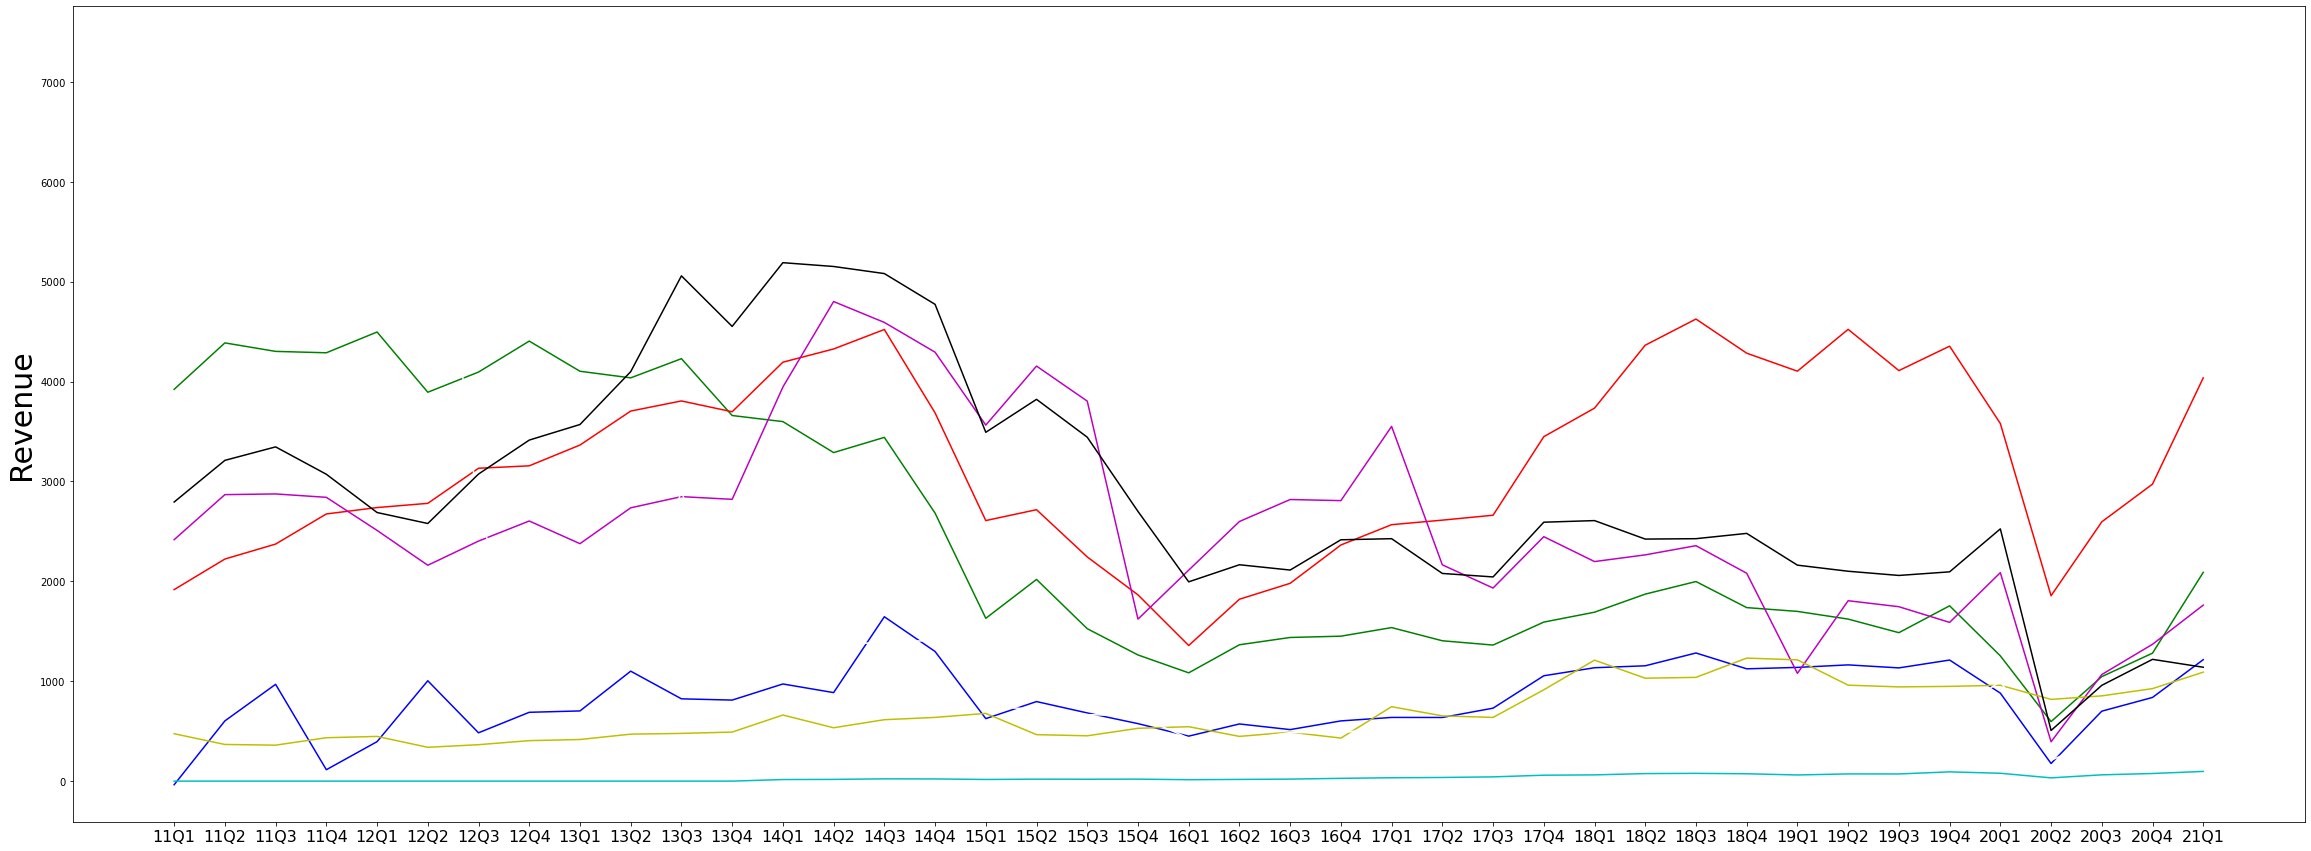

In [33]:
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(15)

plt.ylabel('Revenue', size = 30)

colors = 'bgrcmywk'

for j in range(0,8):
    plt.plot(x, y[j+14], colors[j])

plt.show()

Можно заметить некоторые корреляции. Особенно, общее падение во второй половине 2015 года.

# Correlation of revenue with exogenous factors

In [306]:
Y_test_global = pd.Series(Y_test_global_read).copy()
x_test_global = x_test_global_read.copy()
x_train_global = x_train_global_read.copy()
Y_train_global = Y_train_global_read.copy()

In [307]:
new_fiches = ['date','new COVID cases', 'WTI prices', 'CPI index', 'Q1', 'Q2', 'Q3', 'Q4']
new_fiches_table = x_train_global[new_fiches]

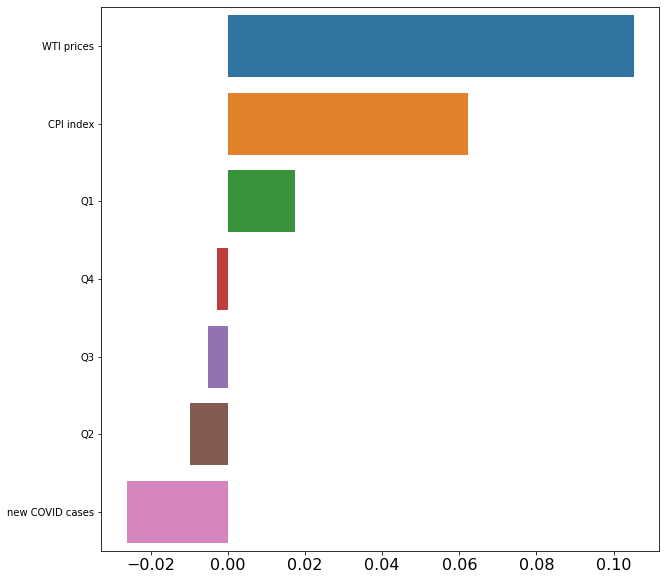

In [308]:
#small_correlation = abs(x_train_global.corrwith(Y_train_global)) < 0.01 

#print(x_train_global.columns[correlation])

columns_with_onlyzeros = ['Research & Development','Other Investment Income (Loss)','Dep % of D&A',
                          'Work In Process', 'Prepaid Expense', 'Current Liabilities', 'NI QQQQ = Y',
                          'Reference Items', 'Amt Recoverable on Contracts', 'Operating Leases', 
                          'Disp of Intangible Assets', 'Acq of Intangible Assets',
                          'Cash Paid for Preferred Div']


#x_train_global.drop(columns = x_train_global.columns[small_correlation], inplace = True)
x_train_global.drop(columns = x_train_global.columns[x_train_global.columns.isna()], inplace = True)
#x_test_global.drop(columns = x_test_global.columns[small_correlation], inplace = True)
x_test_global.drop(columns = x_test_global.columns[x_test_global.columns.isna()], inplace = True)

x_train_global.drop(columns = columns_with_onlyzeros, inplace = True)
x_test_global.drop(columns = columns_with_onlyzeros, inplace = True)



x_train_global.dropna()
x_test_global.dropna()

#correlations = x_train_global[numeric_features].corrwith(Y_train_global).sort_values(ascending=False)
#correlations = correlations.dropna()
#print(correlations.shape)

plot = sns.barplot(y = x_train_global[new_fiches].corrwith(Y_train_global).sort_values(ascending=False).index,
                   x = x_train_global[new_fiches].corrwith(Y_train_global).sort_values(ascending=False))
plot.figure.set_size_inches(10, 10)

Тут корреляции, что странно, очень маленькие

# Correlation of revenue with other reporting features

In [309]:
Y_test_global = pd.Series(Y_test_global_read).copy()
x_test_global = x_test_global_read.copy()
x_train_global = x_train_global_read.copy()
Y_train_global = Y_train_global_read.copy()

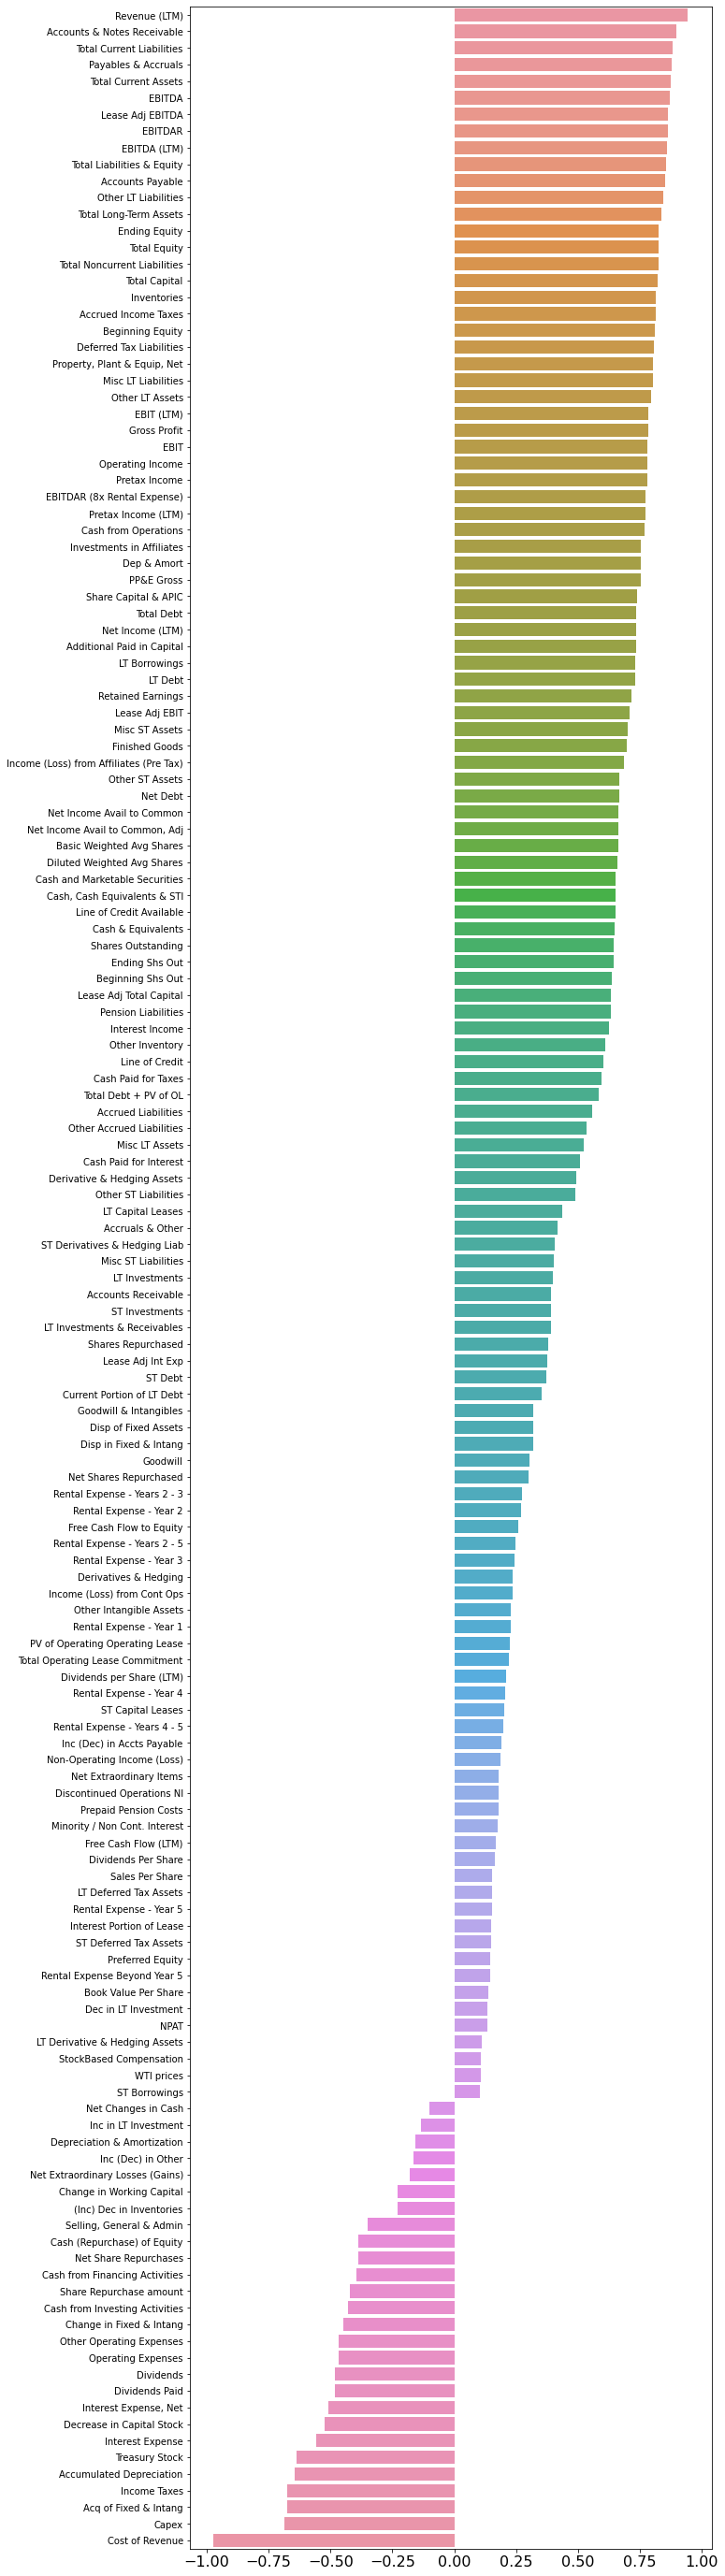

In [313]:
#тут надо поставить побольше число в смолл корреляции
x_train_global_nodate = x_train_global.drop(columns = ['date'])

#Проблемные фичи, их по несколько дубликатов с разными значениями
x_train_global_nodate.drop(columns = ['% Surprise | % Est. vs Consensus', 'Net Income', 'Total Liabilities',
                                      'Consensus:', 'Total Assets', 'Amortization'], inplace = True)

small_correlation = abs(x_train_global_nodate.corrwith(Y_train_global)) < 0.1 



columns_with_onlyzeros = ['Research & Development','Other Investment Income (Loss)','Dep % of D&A',
                          'Work In Process', 'Prepaid Expense', 'Current Liabilities', 'NI QQQQ = Y',
                          'Reference Items', 'Amt Recoverable on Contracts', 'Operating Leases', 
                          'Disp of Intangible Assets', 'Acq of Intangible Assets',
                          'Cash Paid for Preferred Div']


x_train_global_nodate.drop(columns = x_train_global_nodate.columns[small_correlation], inplace = True)
x_train_global_nodate.drop(columns = x_train_global_nodate.columns[x_train_global_nodate.columns.isna()], inplace = True)
#x_test_global.drop(columns = x_test_global.columns[small_correlation], inplace = True)
#x_test_global.drop(columns = x_test_global.columns[x_test_global.columns.isna()], inplace = True)

x_train_global_nodate.drop(columns = columns_with_onlyzeros, inplace = True)
#x_test_global.drop(columns = columns_with_onlyzeros, inplace = True)



x_train_global_nodate.dropna()
#x_test_global.dropna()


plot = sns.barplot(y = x_train_global_nodate.corrwith(Y_train_global).sort_values(ascending=False).index,
                   x = x_train_global_nodate.corrwith(Y_train_global).sort_values(ascending=False))
plot.figure.set_size_inches(10, 50)

In [117]:
x_train_global_nodate.shape

(2132, 256)

Есть очевидные корреляции с Revenue(LTM), Cost of Revenue, потому что они напрямую связаны с выручкой.

# Посмотрим на то, что среди компаний есть старые и новые (те, у которых в начальные годы все показатели равны 0) 

In [221]:
Y_test_global = pd.Series(Y_test_global_read).copy()
x_test_global = x_test_global_read.copy()
x_train_global = x_train_global_read.copy()
Y_train_global = Y_train_global_read.copy()

In [222]:
x_train_global.drop(columns = new_fiches, inplace = True)
x_train_global.drop(columns = 'Days in Period', inplace = True)

In [223]:
#должны быть нули в 327 столбцах

number_of_companies = []
for i in range(41):
    sums_of_zeros = ((x_train_global.loc[i] == np.zeros(327)) * 1).sum(axis = 1) 
    number_of_companies.append(x_train_global.loc[i][(sums_of_zeros != 327)].shape[0])

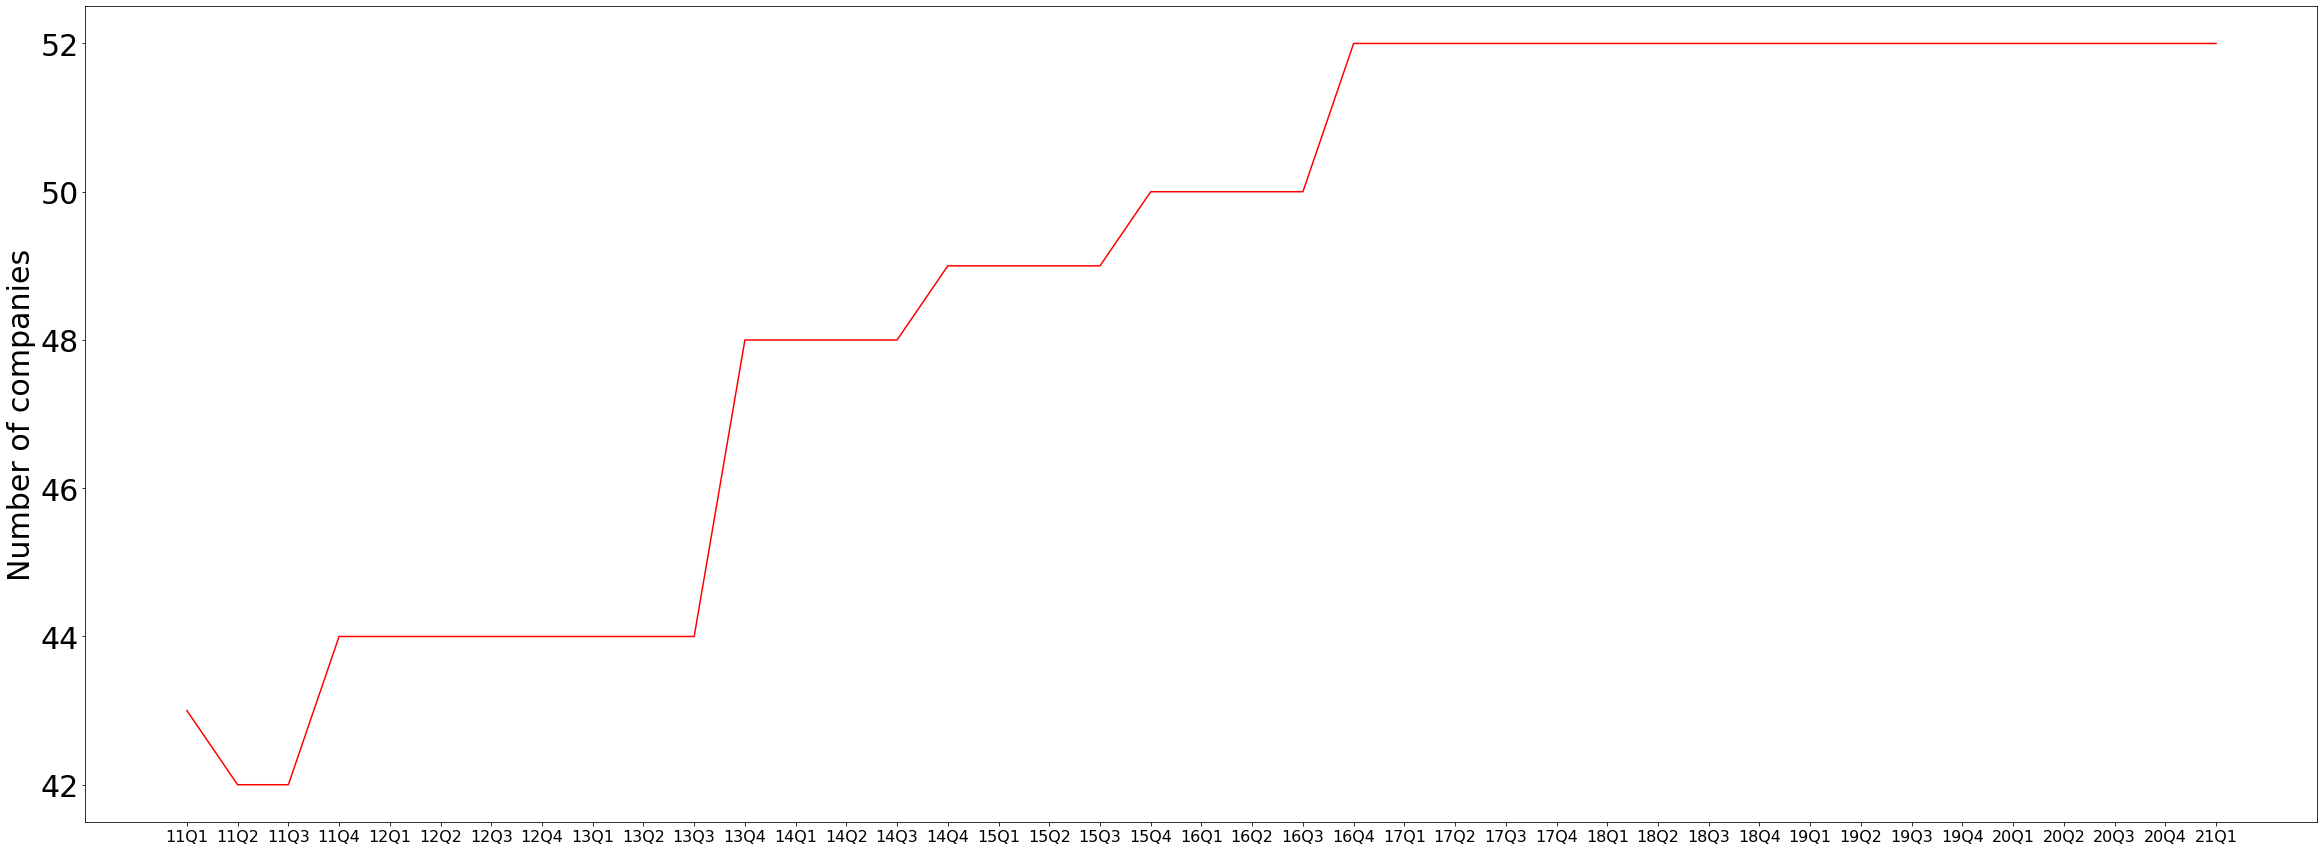

In [224]:
x = [str(11+i//4)+'Q'+str(i%4+1) for i in range(0,41)]


mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 30

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(15)

plt.ylabel('Number of companies', size = 30)
plt.plot(x, number_of_companies, 'r')

plt.show()

Датафрейм с только работающими на данный момент компаниями:

In [245]:
x_active = pd.DataFrame()
y_active = pd.Series()

for j in range(41):
    sums_of_zeros = ((x_train_global.loc[j] == np.zeros(327)) * 1).sum(axis = 1) 
    x_active = x_active.append(x_train_global.loc[j][(sums_of_zeros != 327)])
    y_active = y_active.append(Y_train_global.loc[j][(sums_of_zeros != 327)])

In [249]:
print(x_active.shape)
print(y_active.shape)

(2003, 327)
(2003,)


# Предсказание

In [90]:
print(x_train_global_nodate.columns.isna().sum())

0


In [91]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error, SCORERS
from sklearn.ensemble import RandomForestRegressor

**Random Forest**

In [92]:
from sklearn.model_selection import GridSearchCV

model_RFR = RandomForestRegressor()
gs = GridSearchCV(model_RFR,
                  param_grid={
                      'max_features': ['auto'],# 'log2', 'sqrt'],
                      'max_depth': range(2, 6),
                      'min_samples_leaf': range(1, 6)
                  },
                  cv=3,
                  scoring='neg_mean_absolute_percentage_error')

gs.fit(x_train_global_nodate, Y_train_global)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 6), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 6)},
             scoring='neg_mean_absolute_percentage_error')

In [95]:
gs.best_params_

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5}

In [119]:
x_test_global_nodate = x_test_global[x_train_global_nodate.columns]

In [120]:
model = RandomForestRegressor(max_depth = 5, min_samples_leaf = 5)
model.fit(x_train_global_nodate, Y_train_global)
predict_Y = model.predict(x_test_global_nodate)

print(mean_absolute_percentage_error(predict_Y, Y_test_global))

0.29763081892476906


**Catboost**

In [124]:
model_catboost = CatBoostRegressor(
      learning_rate=0.05,
      n_estimators=500, 
      depth=5, 
      loss_function='MAPE', 
      use_best_model=True
    
    )

model_catboost.fit(x_train_global_nodate, Y_train_global, eval_set=(x_test_global_nodate, Y_test_global))

0:	learn: 0.8900900	test: 0.9894892	best: 0.9894892 (0)	total: 12.2ms	remaining: 6.08s
1:	learn: 0.8727245	test: 0.9742988	best: 0.9742988 (1)	total: 18.7ms	remaining: 4.66s
2:	learn: 0.8525317	test: 0.9535580	best: 0.9535580 (2)	total: 27.2ms	remaining: 4.5s
3:	learn: 0.8329803	test: 0.9348277	best: 0.9348277 (3)	total: 32.7ms	remaining: 4.06s
4:	learn: 0.8217975	test: 0.9253342	best: 0.9253342 (4)	total: 37.8ms	remaining: 3.74s
5:	learn: 0.7964118	test: 0.8994593	best: 0.8994593 (5)	total: 43.1ms	remaining: 3.55s
6:	learn: 0.7870491	test: 0.8933638	best: 0.8933638 (6)	total: 47.9ms	remaining: 3.38s
7:	learn: 0.7749314	test: 0.8841882	best: 0.8841882 (7)	total: 52.6ms	remaining: 3.23s
8:	learn: 0.7619018	test: 0.8662773	best: 0.8662773 (8)	total: 57.5ms	remaining: 3.14s
9:	learn: 0.7458092	test: 0.8441263	best: 0.8441263 (9)	total: 62.5ms	remaining: 3.06s
10:	learn: 0.7334315	test: 0.8285850	best: 0.8285850 (10)	total: 67.2ms	remaining: 2.98s
11:	learn: 0.7228324	test: 0.8186298	best:

In [364]:
model_catboost_2 = CatBoostRegressor()
model_catboost_2.fit(x_train_global_nodate, Y_train_global)
res_2 = model_catboost_2.predict(df_test.loc[41])

Learning rate set to 0.046145
0:	learn: 1998.4765948	total: 13.8ms	remaining: 13.8s
1:	learn: 1943.9248465	total: 20.5ms	remaining: 10.2s
2:	learn: 1892.7113284	total: 28.3ms	remaining: 9.39s
3:	learn: 1838.9477293	total: 35.3ms	remaining: 8.79s
4:	learn: 1795.2877279	total: 41.2ms	remaining: 8.2s
5:	learn: 1755.3821909	total: 47.6ms	remaining: 7.88s
6:	learn: 1710.4098032	total: 53.7ms	remaining: 7.62s
7:	learn: 1669.6735578	total: 59ms	remaining: 7.31s
8:	learn: 1628.7636442	total: 64.1ms	remaining: 7.05s
9:	learn: 1592.5244503	total: 69.2ms	remaining: 6.85s
10:	learn: 1553.8829693	total: 74.4ms	remaining: 6.69s
11:	learn: 1514.2591832	total: 79.3ms	remaining: 6.53s
12:	learn: 1475.2162786	total: 84.4ms	remaining: 6.41s
13:	learn: 1440.1179450	total: 89.3ms	remaining: 6.29s
14:	learn: 1407.1136570	total: 94.4ms	remaining: 6.2s
15:	learn: 1376.8366372	total: 99.8ms	remaining: 6.14s
16:	learn: 1350.0488929	total: 106ms	remaining: 6.12s
17:	learn: 1321.5103822	total: 111ms	remaining: 6.

In [365]:
mean_absolute_percentage_error(Y_test_global_f[41], res_2)

1.1540722295177483

In [140]:
catboostedresults = pd.DataFrame({'predict': predict_Y, 'true': list(Y_test_global)})
catboostedresults

,predict,true
0,182.569229,195.064000
1,335.945106,324.667008
2,381.840878,375.796000
3,1030.734731,1356.000000
4,1084.953620,489.368000
5,272.706069,303.768000
6,1440.686649,1579.000064
7,395.284360,400.231008
8,30.088361,36.779000
9,350.014248,351.646016


# Multivariate Time Series

In [141]:
from statsmodels.tsa.ar_model import AutoReg

In [316]:
x_train_global_f = x_train_global_f[x_train_global_nodate.columns]

In [317]:
x_train_global_f

,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Admin",Depreciation & Amortization,Other Operating Expenses,Operating Income,Non-Operating Income (Loss),"Interest Expense, Net",Interest Expense,...,Net Share Repurchases,Ending Equity,Beginning Shs Out,Shares Repurchased,Ending Shs Out,Share Repurchase amount,Net Shares Repurchased,EBITDAR,EBITDAR (8x Rental Expense),WTI prices
0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,93.54
1,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,102.23
2,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,89.72
3,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,94.01
4,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,102.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,-13.267,-0.505,-5.356,-4.456,0.0,-0.900,-5.861,-0.563,-1.079,-1.079,...,-0.050,128.170016,34.416728,0.016133,34.442844,-0.050174,-0.026116,3.898,19.200,59.78
34,-13.908,-1.361,-5.681,-5.879,0.0,0.198,-7.042,-2.097,-0.998,-0.998,...,0.000,174.580992,34.442844,0.000000,85.864464,0.000000,-51.421620,2.517,9.118,56.37
35,-33.088,4.105,-5.342,-9.599,0.0,4.257,-1.237,-3.624,-5.428,-5.428,...,-0.019,116.040032,85.864464,0.007330,128.977816,-0.018325,-43.113352,16.812,25.926,56.96
36,-34.337,0.236,-5.353,-5.425,0.0,0.072,-5.117,-0.408,-1.213,-1.213,...,-0.157,10.930976,128.977816,0.049474,129.005824,-0.156833,-0.028008,9.567,17.568,45.76


In [354]:
df_test = pd.DataFrame()
for col in x_train_global_f.columns:
    prediction = pd.Series()
    for i in range(52):
        model_ag = AutoReg(endog = x_train_global_f[col][i*38:(i+1)*38],
                           lags = 4,
                           trend='n',
                           seasonal = True,
                           exog = None,
                           hold_back = None,
                           period = 4,
                           missing = 'none')

        fit_ag = model_ag.fit()

        predictions = fit_ag.predict(start = 38,
                                     end = 41,
                                     dynamic=False)
        prediction = prediction.append(pd.Series(data = predictions, name = col), ignore_index = False)
        
    df_test[col] = prediction

In [250]:
predictions_ebitda = pd.Series()
for i in range(52):
    model_ag = AutoReg(endog = EBITDA[i*41:(i+1)*41],
                       lags = 4,
                       trend='n',
                       seasonal = True,
                       exog = None,
                       hold_back = None,
                       period = 4,
                       missing = 'none')

    fit_ag = model_ag.fit()

    predictions = fit_ag.predict(start = 41,
                                 end = 44,
                                 dynamic=False)
    predictions_ebitda = predictions_ebitda.append(pd.Series(data = predictions, name = 'EBITDA'), ignore_index = False)

In [321]:
predictions_ebitda.head(20)

41      98.119196
42      99.507826
43     111.758621
44     110.587347
41     239.622110
42     246.477355
43     290.328918
44     294.891153
41     217.403630
42     205.241504
43     199.202040
44     216.461203
41     883.308542
42     930.615967
43     868.120630
44     869.454072
41      38.207733
42     790.380195
43     822.614279
44    1371.384474
dtype: float64

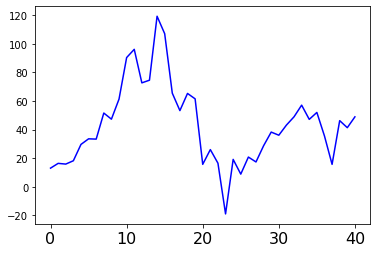

In [224]:
plt.plot(EBITDA[i*41:(i+1)*41], 'b')

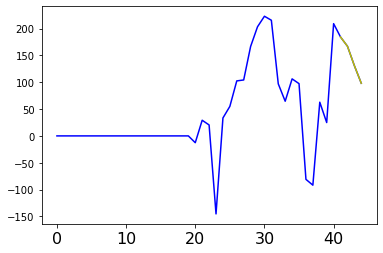

In [222]:
plt.plot(list(EBITDA[i*41:(i+1)*41])+list(predictions), 'b')
plt.plot(predictions, 'y')